11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.8411 - loss: 0.5179 - val_accuracy: 0.9812 - val_loss: 0.0633
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.9814 - loss: 0.0605 - val_accuracy: 0.9864 - val_loss: 0.0484
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.9880 - loss: 0.0393 - val_accuracy: 0.9838 - val_loss: 0.0524
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.9893 - loss: 0.0311 - val_accuracy: 0.9844 - val_loss: 0.0503
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9920 - loss: 0.0248 - val_accuracy: 0.9887 - val_loss: 0.0409
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9884 - loss: 0.0365

✅ Test Accuracy : 99.14%


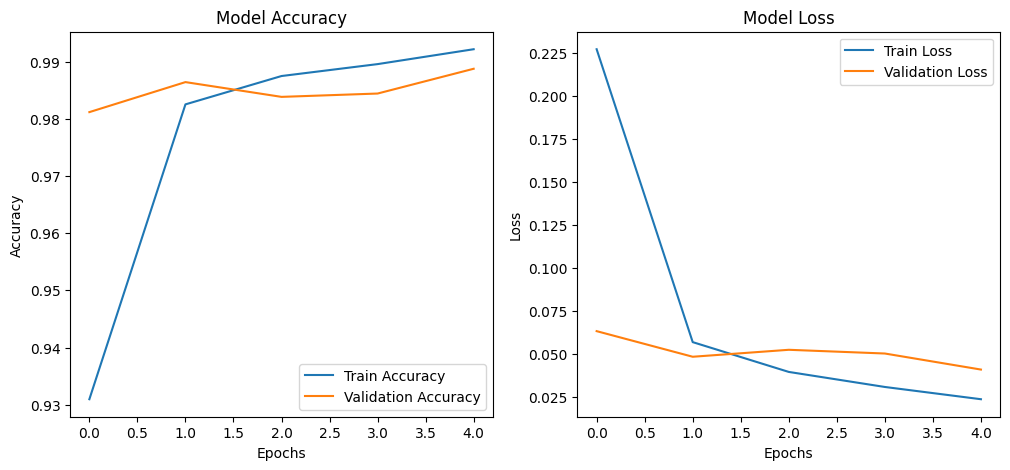

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape to add channel dimension
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# One-hot encode labels
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

# Build CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(train_images, train_labels,
                    epochs=5, batch_size=64,
                    validation_split=0.2)

# Evaluate on test set
_, test_acc = model.evaluate(test_images, test_labels)
print(f"\n✅ Test Accuracy : {round(test_acc * 100, 4)}%")

# -------- 📊 Plot Accuracy and Loss --------
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()
